# Spectral and total absorption rate (ExoPhot Working Group 4)

**1) Load libraries, functions and names of file containing needed spectra**

Load libraries and functions

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools
import spectral_overlap_functions as sof # .py file with functions needed to quantify spectral overlap

Define functions that will be handy

In [2]:
def read_files(star, atmos, pigm):
    """Helper function to load spectra from
    specified files"""
    
    flux = np.loadtxt(folder_star + star,usecols=(0,1)) # [Angstrom, erg/cm2/s/A]
    trans = np.loadtxt(folder_atmos + atmos,usecols=(0,1)) # [mum, None]
    epsilon =  np.loadtxt(folder_pigm + pigm,usecols=(0,1)) # [nm, M-1 cm-1]
    
    return flux, trans, epsilon

def plot_spectra(sigma_int,spec_abs_rate_int,abs_rate,ax):
    """Helper function to plot absorption cross section
    and spectral absorption rate"""
    
    ax.plot(sigma_int[:,0],sigma_int[:,1])
    ax1=ax.twinx()
    ax1.plot(spec_abs_rate_int[:,0],spec_abs_rate_int[:,1], c = 'tab:orange')
    ax.set_title(pigm[:-4] + ' in \n' + atmos[:-4])
    ax.set_ylabel('Cross section (cm$^{-2}$)',color = 'tab:blue')
    ax1.set_ylabel('Spectral Absorption \n Rate ($\AA^{-1}$ s$^{-1}$)',color = 'tab:orange')
    ax.set_xlabel('Wavelength ($\AA$)')
    abs_str = '{:.2f}'.format(abs_rate)
    ax.text(0.01, 0.85, 'Abs. Rate:\n ' + abs_str + ' s$^{-1}$', horizontalalignment='left', 
         verticalalignment='center',color= 'gray', transform=ax.transAxes)

Retrieve names of files with star flux, atmosphere transmitance and pigment absorption spectra

In [3]:
# --------------------------------------------------------------------
# Lists of atmospheres, pigments and stellar models files
# --------------------------------------------------------------------
nomlist_atmos = 'atmos_list.txt';
nomlist_star = 'stellar_list.txt';
nomlist_pigm = 'pigments_list.txt';

# folder containing input files
folder_atmos = 'input/atmos/'
folder_star = 'input/stellar/'
folder_pigm = 'input/pigments/'

# Read and store the names of all files   
fid = open(nomlist_atmos,"r")
names_atmos = np.genfromtxt(fid,dtype='str').tolist()
fid.close()

fid = open(nomlist_star,"r")
names_star = np.genfromtxt(fid,dtype='str').tolist()
fid.close()

fid = open(nomlist_pigm,"r")
names_pigm = np.genfromtxt(fid,dtype='str').tolist()
fid.close()

In [4]:
print(names_atmos)
print(names_star)
print(names_pigm)

['g2v_psg_atmos1_trn.txt', 'g2v_psg_atmos2_trn.txt']
['g2v.txt', 'g2v.txt']
['Chl_a.txt', 'Chl_b.txt']


**2) Example of usage for a single combination of star, atmosphere and pigment**

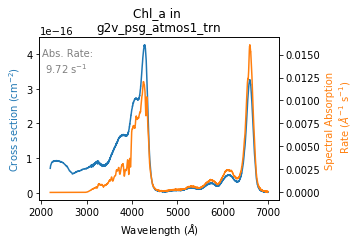

In [5]:
# select file names
atmos = names_atmos[0]
star = atmos[0:3] + '.txt' # the stellar model file depends on the atmosphere file
pigm =  names_pigm[0]

# Exoplanet system parameters (Sun/Earth pair)
Rs = 696340 # stellar radius in km
sma = 1.496e+8 # Exoplanet semi-major axis in km

# read files to retrieve spectra
flux, trans, epsilon = read_files(star, atmos, pigm)

# compute and save spectral and total absorption rates
flux_int, trans_int, sigma_int, spec_abs_rate_int, abs_rate = sof.spectral_overlap(flux, trans, epsilon, Rs, sma)

# save results
sof.save_results(star, atmos, pigm, Rs, sma, spec_abs_rate_int, abs_rate)

# plot spectra
fig, ax = plt.subplots(1,1,figsize=(5,3.5))
plot_spectra(sigma_int,spec_abs_rate_int,abs_rate,ax)

plt.tight_layout()
#plt.savefig('spectral_overlap_plot.jpg', dpi = 300)
plt.show()
   


**3) Example of usage for several combinations of stars, atmosphere and pigments**

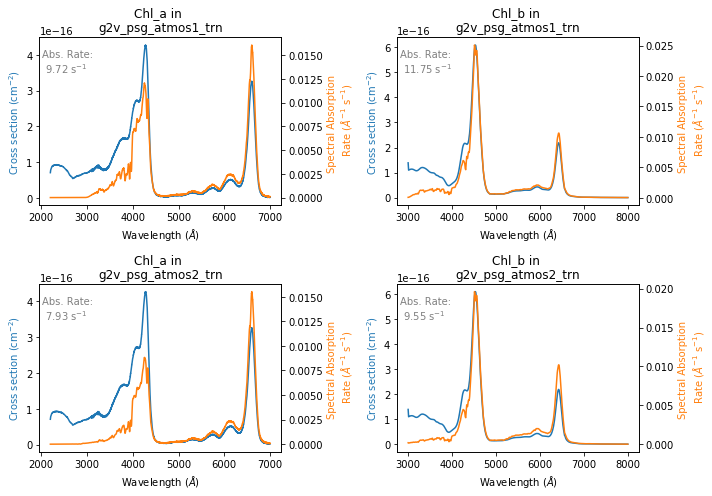

In [6]:
# iterate through atmosphere and pigment file names:
r1 = range(len(names_atmos))
r2 = range(len(names_pigm))

fig, ax = plt.subplots(len(names_atmos),len(names_pigm),figsize=(10,7))

for ii, jj in itertools.product(r1,r2): # this is a nested loop
    # select file names
    atmos = names_atmos[ii]
    star = atmos[0:3] + '.txt' # the stellar model file depends on the atmosphere file
    pigm =  names_pigm[jj]

    # Exoplanet system parameters (Sun/Earth pair)
    Rs = 696340 # stellar radius in km
    sma = 1.496e+8 # Exoplanet semi-major axis in km
    
    # read files to retrieve spectra
    flux, trans, epsilon = read_files(star, atmos, pigm)

    # compute and save spectral and total absorption rate
    flux_int, trans_int, sigma_int, spec_abs_rate_int, abs_rate = sof.spectral_overlap(flux, trans, epsilon, Rs, sma)
    
    # save results
    sof.save_results(star, atmos, pigm, Rs, sma, spec_abs_rate_int, abs_rate)
    
    # plot spectra
    plot_spectra(sigma_int,spec_abs_rate_int,abs_rate,ax[ii,jj])

plt.tight_layout()
#plt.savefig('spectral_overlap_plot_multiple.jpg', dpi = 300)
plt.show()  
